<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_3_FISQUI_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

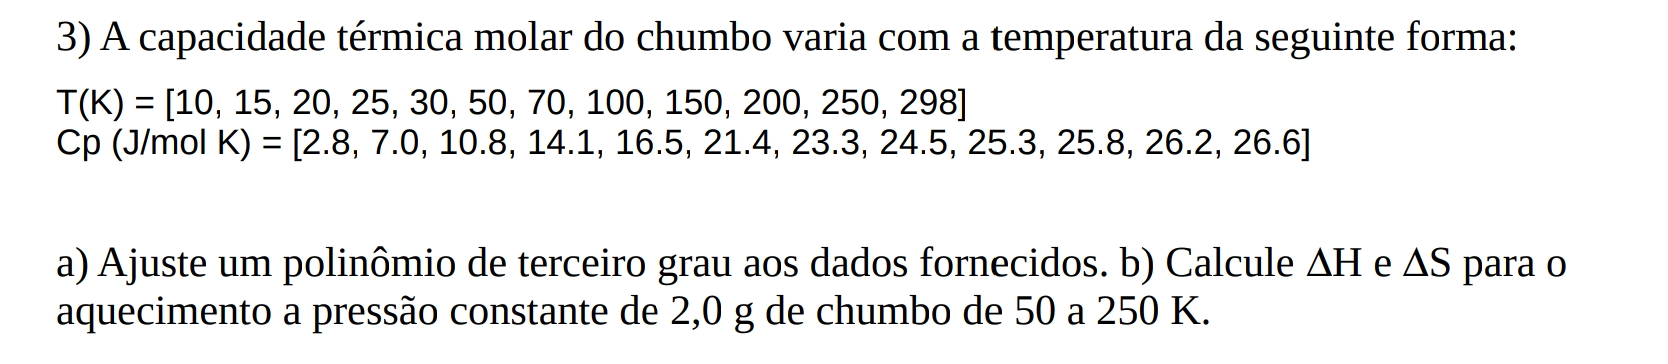

=== DADOS EXPERIMENTAIS ===
Temperatura (K): [ 10  15  20  25  30  50  70 100 150 200 250 298]
Cp (J/mol·K):    [ 2.8  7.  10.8 14.1 16.5 21.4 23.3 24.5 25.3 25.8 26.2 26.6]

=== (a) AJUSTE POLINOMIAL DE TERCEIRO GRAU ===
Cp(T) = 5.061569e-06 T³ + -2.828751e-03 T² + 4.804023e-01 T + 1.769558e+00



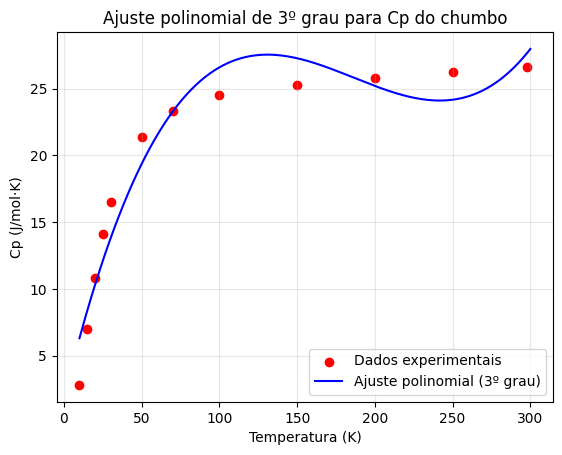

=== (b) CÁLCULO DE ΔH E ΔS ===
Massa = 2.0 g   Molar = 207.2 g/mol   n = 0.009653 mol
Aquecimento de 50 K até 250 K

ΔH_molar = 5085.799 J/mol
ΔH (2 g Pb) = 49.091 J

ΔS_molar = 40.217 J/mol·K
ΔS (2 g Pb) = 0.388 J/K

=== INTERPRETAÇÃO ===
ΔH > 0 → processo endotérmico (absorve calor).
ΔS > 0 → aumento da desordem ao aquecer o sólido.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# DADOS EXPERIMENTAIS
# =============================================================================
T = np.array([10, 15, 20, 25, 30, 50, 70, 100, 150, 200, 250, 298])  # Temperatura (K)
Cp = np.array([2.8, 7.0, 10.8, 14.1, 16.5, 21.4, 23.3, 24.5, 25.3, 25.8, 26.2, 26.6])  # Cp (J/mol·K)

print("=== DADOS EXPERIMENTAIS ===")
print("Temperatura (K):", T)
print("Cp (J/mol·K):   ", Cp)
print()

# =============================================================================
# (a) AJUSTE DE POLINÔMIO DE TERCEIRO GRAU (np.polyfit)
# =============================================================================
# polyfit devolve os coeficientes de maior para menor grau: d, c, b, a
coef = np.polyfit(T, Cp, 3)
d, c, b, a = coef

print("=== (a) AJUSTE POLINOMIAL DE TERCEIRO GRAU ===")
print(f"Cp(T) = {d:.6e} T³ + {c:.6e} T² + {b:.6e} T + {a:.6e}")
print()

# Função Cp(T) ajustada
def Cp_fit(T):
    return d*T**3 + c*T**2 + b*T + a

# Gráfico dos dados experimentais e do ajuste
T_continuo = np.linspace(10, 300, 300)
plt.scatter(T, Cp, color='red', label='Dados experimentais')
plt.plot(T_continuo, Cp_fit(T_continuo), 'b-', label='Ajuste polinomial (3º grau)')
plt.xlabel('Temperatura (K)')
plt.ylabel('Cp (J/mol·K)')
plt.title('Ajuste polinomial de 3º grau para Cp do chumbo')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# =============================================================================
# (b) CÁLCULO DE ΔH E ΔS PARA 2,0 g DE CHUMBO DE 50 A 250 K
# =============================================================================
M_molar_Pb = 207.2   # g/mol
massa = 2.0          # g
n = massa / M_molar_Pb  # número de mols
T1, T2 = 50, 250     # limites de integração

print("=== (b) CÁLCULO DE ΔH E ΔS ===")
print(f"Massa = {massa} g   Molar = {M_molar_Pb} g/mol   n = {n:.6f} mol")
print(f"Aquecimento de {T1} K até {T2} K")
print()

# ---- Integração analítica ----
# ∫ Cp(T) dT = aT + (b/2)T² + (c/3)T³ + (d/4)T⁴
def integral_dH(T):
    return a*T + (b/2)*T**2 + (c/3)*T**3 + (d/4)*T**4

# ∫ Cp(T)/T dT = a ln(T) + bT + (c/2)T² + (d/3)T³
def integral_dS(T):
    return a*np.log(T) + b*T + (c/2)*T**2 + (d/3)*T**3

# ΔH e ΔS molares
delta_H_molar = integral_dH(T2) - integral_dH(T1)
delta_S_molar = integral_dS(T2) - integral_dS(T1)

# Valores para 2 g de Pb
delta_H = n * delta_H_molar
delta_S = n * delta_S_molar

print(f"ΔH_molar = {delta_H_molar:.3f} J/mol")
print(f"ΔH (2 g Pb) = {delta_H:.3f} J")
print()
print(f"ΔS_molar = {delta_S_molar:.3f} J/mol·K")
print(f"ΔS (2 g Pb) = {delta_S:.3f} J/K")
print()

# =============================================================================
# INTERPRETAÇÃO
# =============================================================================
print("=== INTERPRETAÇÃO ===")
print("ΔH > 0 → processo endotérmico (absorve calor).")
print("ΔS > 0 → aumento da desordem ao aquecer o sólido.")
